In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("./fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


#### EASY 1. How many unique customers are in the dataset?


In [33]:
count_unique_customers = df['customer_id'].nunique()
print("There are", count_unique_customers, "unique customers.")

There are 5191 unique customers.


#### EASY 2. What are the different categories of products available? How many unique categories are there?

In [10]:
categories = df['category'].unique()
number = df['category'].nunique()

print("")
print("The product categories are:")

for category in categories: 
    print(category)

print("")
print("In total, there are", number, "unique categories.")


The product categories are:
Clothing
Shoes
Books
Cosmetics
Food & Beverage
Toys
Technology
Souvenir

In total, there are 8 unique categories.


#### EASY 3. Which payment method is the most popular? How many times was it used?

In [32]:
payment_method = df['payment_method'].value_counts().idxmax()
number_of_times = df['payment_method'].value_counts().max()

print("The most popular method is", payment_method)
print("It was used", number_of_times, "times")

The most popular method is Cash
It was used 44447 times


#### MEDIUM 1. What are the three most popular categories, by total sales?

In [18]:
df['total'] = df['quantity'] * df['price']
sales_per_category = df.groupby('category')['total'].sum()
top_three = sales_per_category.sort_values(ascending=False).head(3).index.tolist()

print("The top three categories, by total sales, are:")
for category in top_three:
    print(category)

The top three categories, by total sales, are:
Clothing
Shoes
Technology


#### MEDIUM 2. What are the total sales attributed to customers over the age of 45?

In [34]:
sales = pd.read_csv('fct_invoice.csv')
age = pd.read_json('dim_customer.json')

merged = pd.merge(sales, age, left_on='customer_id', right_on='id')

merged['total_sales'] = merged['quantity'] * merged['price']
over_45 = merged[merged['age'] > 45]

sales_over_45 = over_45['total_sales'].sum()

print("The total sales attributed to customers over the age of 45 is", sales_over_45)

The total sales attributed to customers over the age of 45 is 82039768.15


#### MEDIUM 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

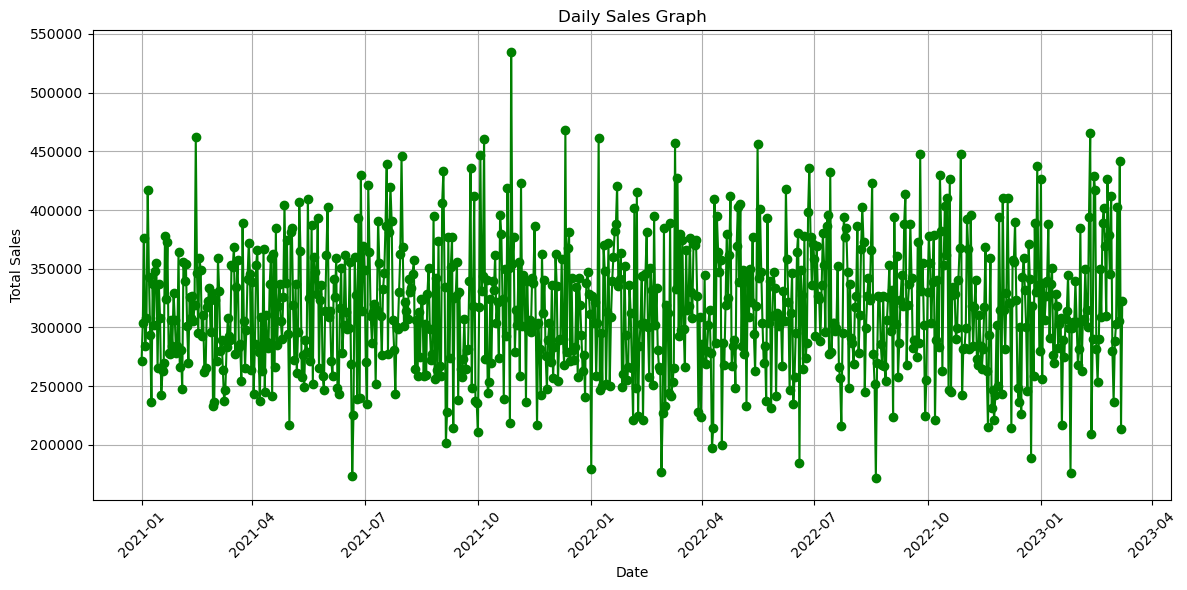

In [38]:
import matplotlib.pyplot as plt

df = pd.read_csv('fct_invoice.csv')
df['total'] = df['quantity'] * df['price']

df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df.set_index('invoice_date', inplace=True)
daily_sales = df['total'].resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker="o", linestyle='-', color='g')
plt.title('Daily Sales Graph')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

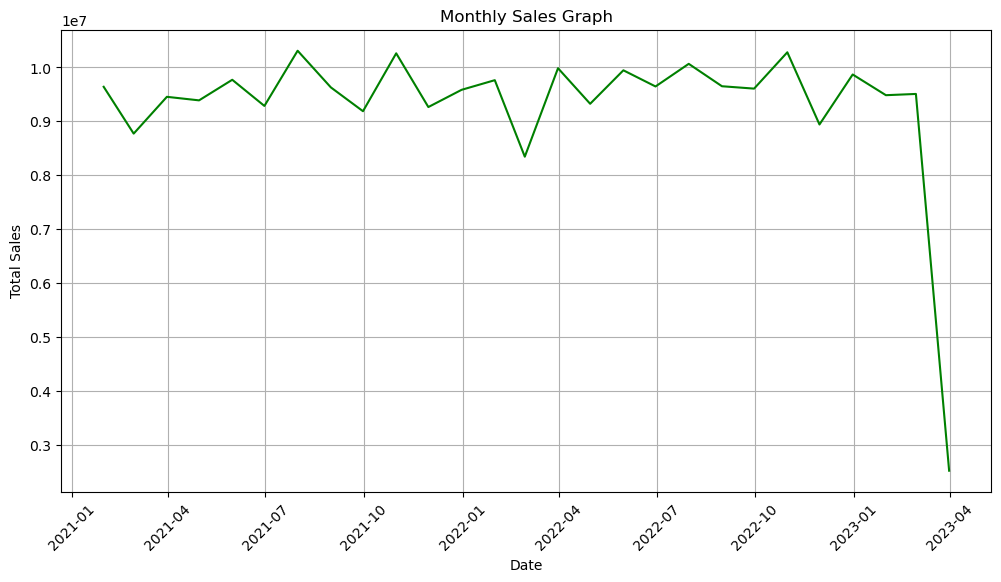

In [37]:
df = pd.read_csv('fct_invoice.csv')
df['total'] = df['quantity'] * df['price']

df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

df.set_index('invoice_date', inplace=True)
monthly_sales = df['total'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, linestyle='-', color='g')
plt.title('Monthly Sales Graph')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

#### HARD 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [31]:
customers_df = pd.read_json('dim_customer.json')
sales_df = pd.read_csv('fct_invoice.csv')

sales_df['sales'] = sales_df['quantity'] * sales_df['price']
customers_df['Decade'] = (customers_df['age'] // 10) * 10

merged_df = sales_df.merge(customers_df[['id', 'Decade']], left_on='customer_id', right_on='id')

pivot_table = pd.pivot_table(merged_df, values='sales', index='category', columns='Decade', aggfunc='sum', fill_value=0)

pivot_table.columns = [f"{int(col)}-{int(col)+9}" if col != 0 else "Unknown" for col in pivot_table.columns]

display(pivot_table)

,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
